# CLUSTER ANALYSIS OF STOCKS USING K-MEANS ALGORITHM

DATASET SOURCE: "https://resources.oreilly.com/examples/0636920128861/raw/master/Datasets/sample_stocks.csv"

### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('Sample_stocks.csv')

### DATASET PRE-ANALYSIS

In [3]:
dataset.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [4]:
dataset.count()

returns          648
dividendyield    648
dtype: int64

In [5]:
dataset.max()

returns          40.0
dividendyield     4.9
dtype: float64

In [6]:
dataset.min()

returns         -20.0
dividendyield     0.0
dtype: float64

In [7]:
dataset.shape

(648, 2)

In [8]:
for i in dataset.columns:
    print(i,"---",dataset[i].dtype)

returns --- int64
dividendyield --- float64


In [9]:
dataset.isna().sum()

returns          0
dividendyield    0
dtype: int64

### DATASET ASSIGNED TO VARIABLE X

In [10]:
X = dataset.iloc[:, [1,0]].values

In [11]:
X

array([[  0., -19.],
       [  0., -13.],
       [  0., -14.],
       ...,
       [  4.,   1.],
       [  4.,  22.],
       [  4., -16.]])

### IMPORTING kmeans LIBRARY

In [12]:
from sklearn.cluster import KMeans

### USING ELBOW METHOD TO FIND THE OPTIMAL K NUMBER OF CLUSTERS

In [17]:
#elbow method to find optimal number of clusters
wcss = []
for i in range(1, 8):
    clust = KMeans(n_clusters = i, init='k-means++',n_init=10, max_iter=300,tol=0.0001,random_state=42)
    clust.fit(X)
    wcss.append(clust.inertia_)

### ELBOW GRAPH 

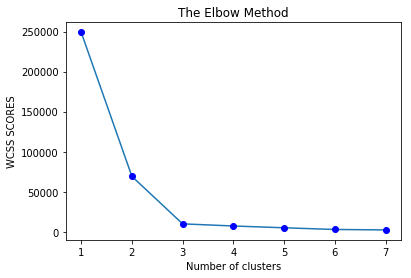

In [18]:
plt.plot(range(1, 8), wcss)
plt.plot(range(1, 8), wcss,'bo')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS SCORES')
plt.show()

 ## Appropriate number of clusters have been identified (k=3)
    When we graph the plot, we see that the graph form an elbow after 3 clusters,
    implying that addition of more clusters do not explain much more of the variance in 
    our relevant variable

### MODEL CREATION AND TRAINING

In [19]:
# Fitting K-Means to the dataset
clust2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_clust2 = clust2.fit_predict(X)

### VISUALISING THE K-MEANS CLUSTERING MODEL

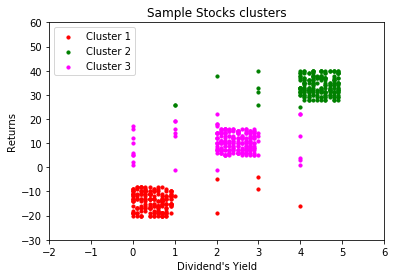

In [20]:
# Visualising the clusters
plt.scatter(X[y_clust2 == 0, 0], X[y_clust2 == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_clust2 == 1, 0], X[y_clust2 == 1, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_clust2 == 2, 0], X[y_clust2 == 2, 1], s = 10, c = 'magenta', label = 'Cluster 3')
plt.xlim([-2,6])
plt.ylim([-30,60])
plt.title('Sample Stocks clusters')
plt.xlabel("Dividend's Yield")
plt.ylabel('Returns')
plt.legend()
plt.show()

  ### Definition of 'Dividend Yield':
        Dividend yield is the financial ratio that measures the quantum of cash dividends paid out to shareholders relative to the market value per share. It is computed by dividing the dividend per share by the market price per share and multiplying the result by 100. A company with a high dividend yield pays a substantial share of its profits in the form of dividends. Dividend yield of a company is always compared with the average of the industry to which the company 
        Suppose a company with a stock price of Rs 100 declares a dividend of Rs 10 per share. In that case, the dividend yield of the stock will be 10/100*100 = 10%. 
        
        ***High dividend yield stocks are good investment options during volatile times, as these companies offer good payoff options.
        
  ### Definition of 'Return':
      A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment. A return can be expressed nominally as the change in dollar value of an investment over time. A return can be expressed as a percentage derived from the ratio of profit to investment. 
      
      Positive Return:
         A positive return is the profit, or money made, on an investment or venture.
         
      Negative Return:
         A negative return is the loss, or money lost, on an investment or venture.


### FINAL STUDY ON CLUSTERS

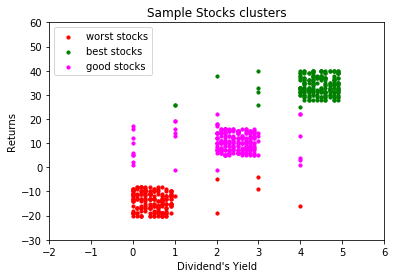

In [21]:
# Visualising the clusters based on study
plt.scatter(X[y_clust2 == 0, 0], X[y_clust2 == 0, 1], s = 10, c = 'red', label = 'worst stocks')
plt.scatter(X[y_clust2 == 1, 0], X[y_clust2 == 1, 1], s = 10, c = 'green', label = 'best stocks')
plt.scatter(X[y_clust2 == 2, 0], X[y_clust2 == 2, 1], s = 10, c = 'magenta', label = 'good stocks')
plt.xlim([-2,6])
plt.ylim([-30,60])
plt.title('Sample Stocks clusters')
plt.xlabel("Dividend's Yield")
plt.ylabel('Returns')
plt.legend()
plt.show()